## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
data = pd.read_csv("diabetes.csv")

## Exploring the dataset

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### About dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The details about all attributes are given below.

**Attributes:**

* **Pregnancies:** Number of times a woman has been pregnant
* **Glucose:** Blood glucose level
* **BloodPressure:** Blood pressure measurement in mm Hg
* **SkinThickness:** Skin thickness (mm)
* **Insulin:** Blood insulin level (μU/mL)
* **BMI:** Body mass index (calculated from weight and height)
* **DiabetesPedigreeFunction:** Function score based on family history of diabetes
* **Age:** Patient's age (years)
* **Outcome:** Indicates presence of diabetes (1 - Yes, 0 - No)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking for null values and duplicates

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset.

In [6]:
data.duplicated().sum()

0

There are no duplicates in the datasets.

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outlier Treatment

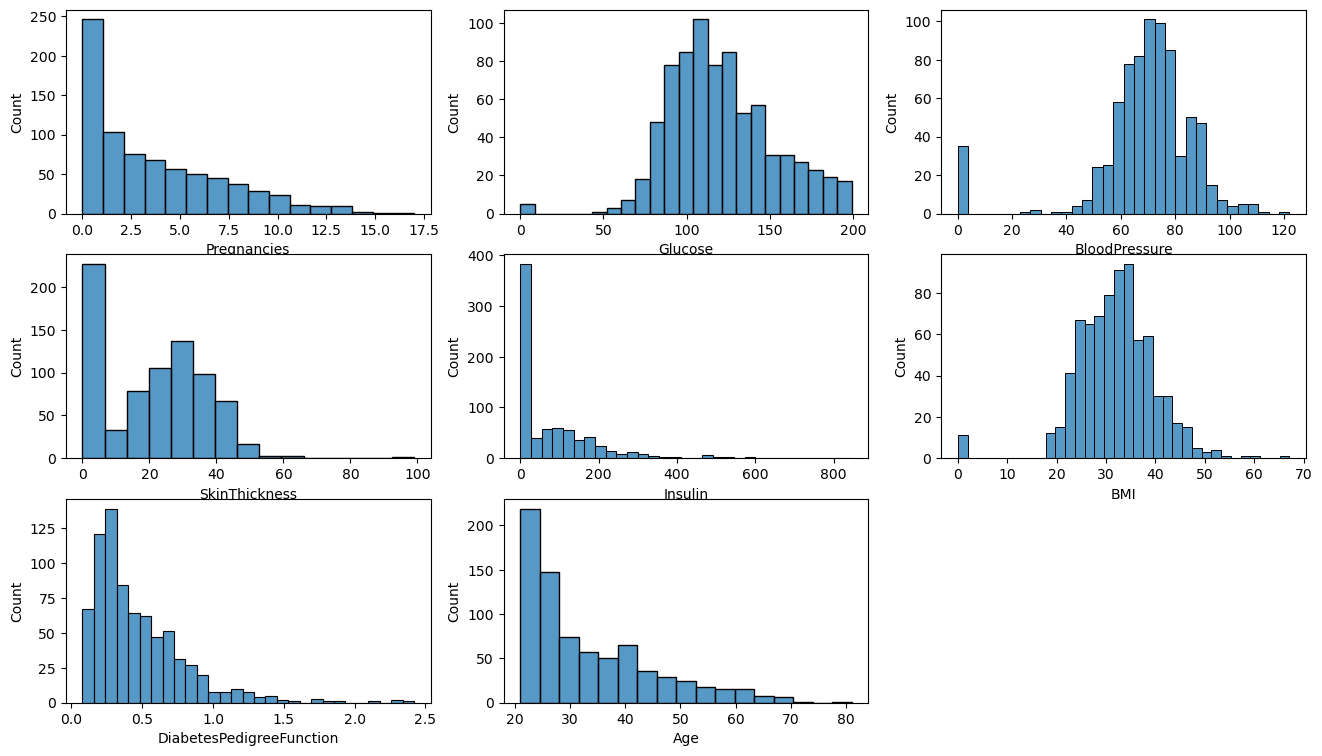

In [8]:
plt.figure(figsize=(16,9))
plt.subplot(3,3,1)
sns.histplot(data['Pregnancies'])
plt.subplot(3,3,2)
sns.histplot(data['Glucose'])
plt.subplot(3,3,3)
sns.histplot(data['BloodPressure'])
plt.subplot(3,3,4)
sns.histplot(data['SkinThickness'])
plt.subplot(3,3,5)
sns.histplot(data['Insulin'])
plt.subplot(3,3,6)
sns.histplot(data['BMI'])
plt.subplot(3,3,7)
sns.histplot(data['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.histplot(data['Age'])
plt.show()

## Boxplot

In [9]:
def plot_boxplot(data, ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

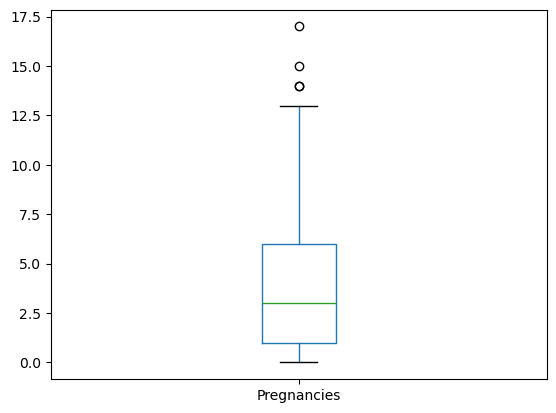

In [10]:
plot_boxplot(data, "Pregnancies")

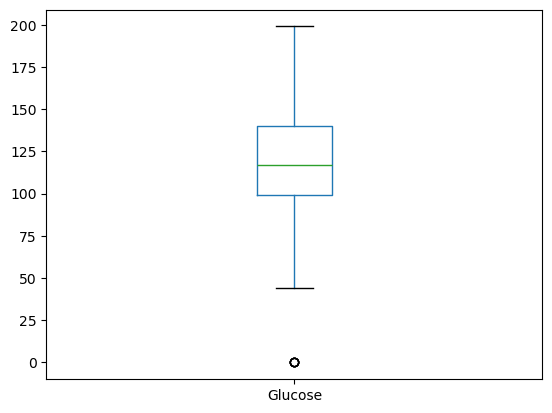

In [11]:
plot_boxplot(data, "Glucose")

## Remove Outliers

In [12]:
def outliers(data,ft):
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = data.index[(data[ft] < lower_bound) | (data[ft] > upper_bound)]

    return ls

In [13]:
index_list = []
for feature in data.columns:
    index_list.extend(outliers(data, feature))

In [14]:
#index_list

In [15]:
# define a function called "remove" which returns a cleaned dataframe without outliers

def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [16]:
data_cleaned = remove(data, index_list)

In [17]:
data_cleaned.shape

(639, 9)

In [18]:
data.shape

(768, 9)

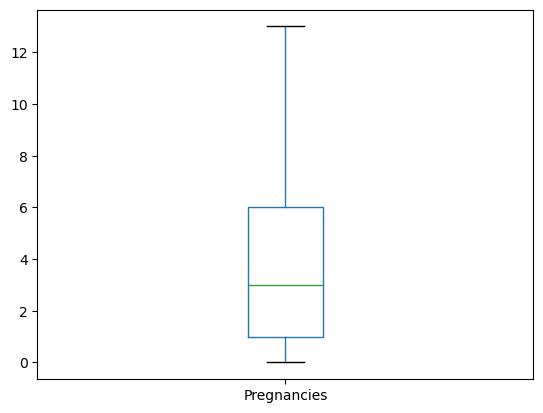

In [19]:
plot_boxplot(data_cleaned, "Pregnancies")

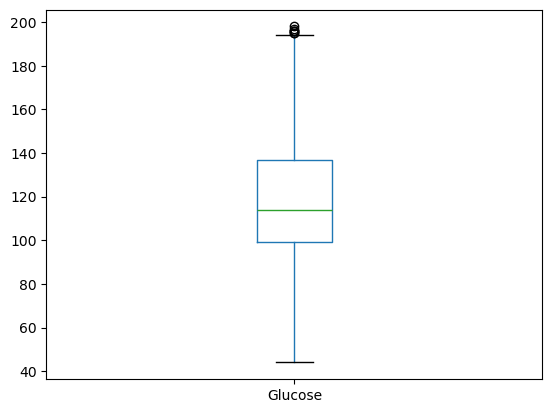

In [20]:
plot_boxplot(data_cleaned, "Glucose")

In [21]:
data_cleaned.to_csv('diabetes_cleaned.csv', index = False)

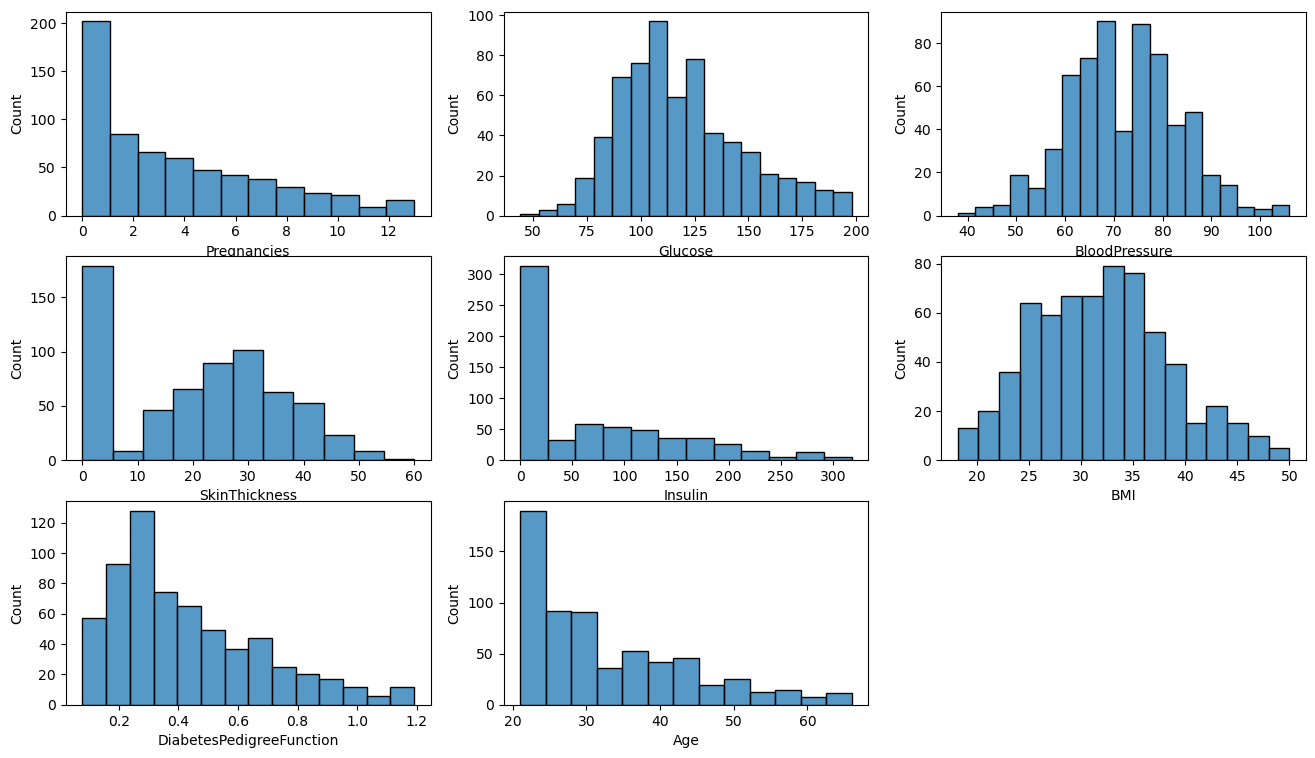

In [22]:
plt.figure(figsize=(16,9))
plt.subplot(3,3,1)
sns.histplot(data_cleaned['Pregnancies'])
plt.subplot(3,3,2)
sns.histplot(data_cleaned['Glucose'])
plt.subplot(3,3,3)
sns.histplot(data_cleaned['BloodPressure'])
plt.subplot(3,3,4)
sns.histplot(data_cleaned['SkinThickness'])
plt.subplot(3,3,5)
sns.histplot(data_cleaned['Insulin'])
plt.subplot(3,3,6)
sns.histplot(data_cleaned['BMI'])
plt.subplot(3,3,7)
sns.histplot(data_cleaned['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.histplot(data_cleaned['Age'])
plt.show()

The outlier data points have been removed.

## Data visualization

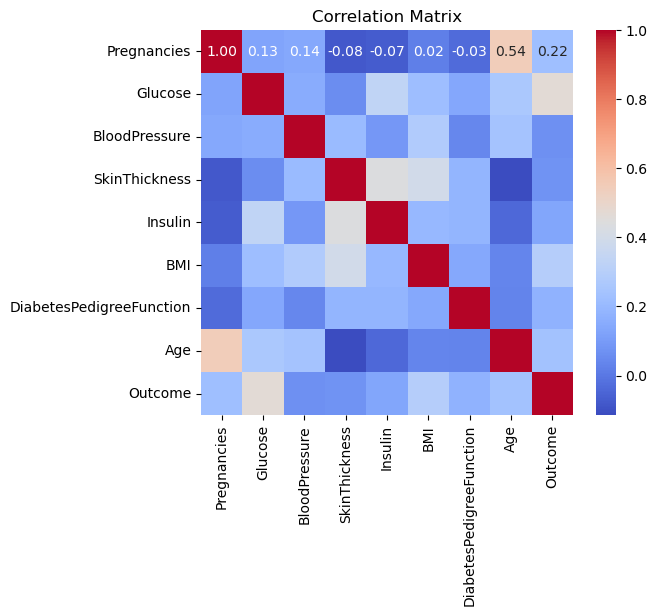

In [23]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Function for Stacked Histograms with Outcome Coloring
def plot_stacked_histograms(data, features, figsize=(15, 12)):
 
  num_features = len(features)
  num_rows = (num_features + 3) // 3  

  plt.figure(figsize=figsize)
  for i, feature in enumerate(features):
    row_num = (i // 3) + 1  
    col_num = (i % 3) + 1  

    plt.subplot(num_rows, 3, (row_num - 1) * 3 + col_num)
    sns.histplot(data=data, x=feature, hue="Outcome", multiple="stack", kde=True)
    plt.title(f"{feature} by Outcome")  

  plt.tight_layout()
  plt.show()

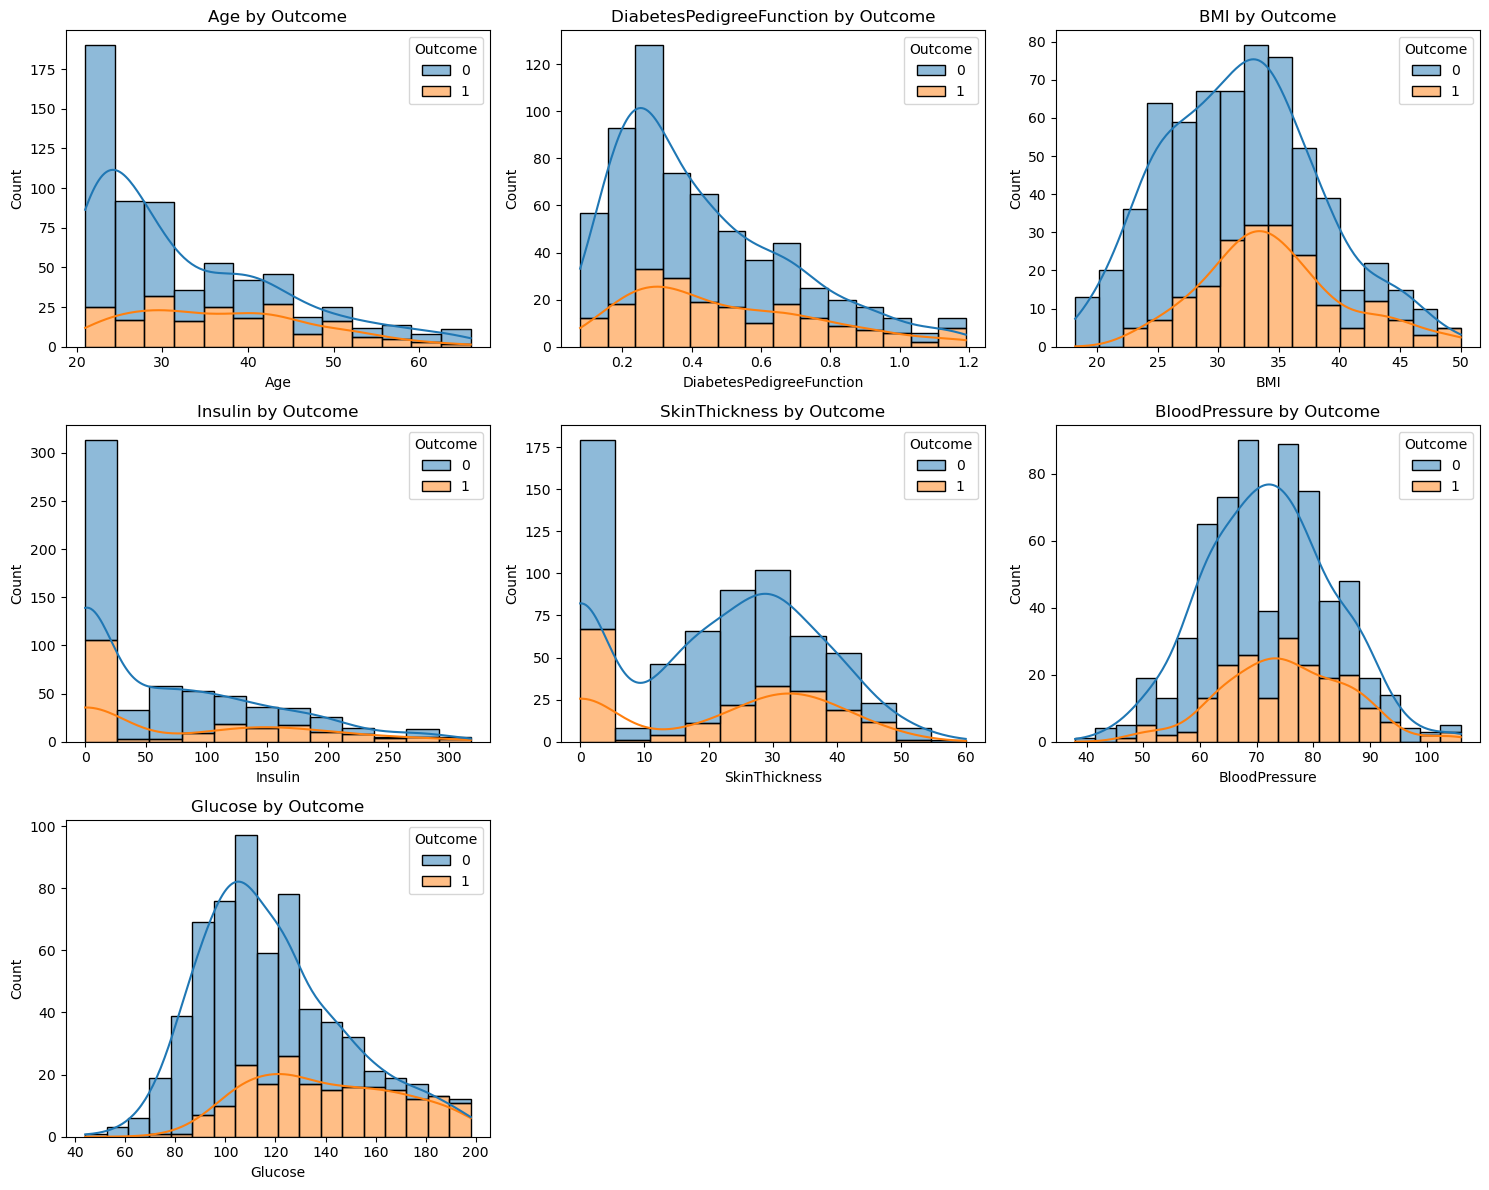

In [25]:
# Calling the function with our data and list of features
features = ['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 
            'SkinThickness', 'BloodPressure', 'Glucose']
plot_stacked_histograms(data_cleaned, features)

By analyzing these stacked histograms, we can observe how the distribution of each feature (e.g., 'Age', 'BMI') varies across the two outcome groups. This visualization technique allows us to identify potential patterns or relationships between feature values and the presence or absence of diabetes.

In [26]:
# Function for scatter plot to show the distribution of the age VS other features
def plot_scatter_age_distribution(data, features, figsize=(10, 30)):
   
    num_features = len(features)
    num_rows = num_features 

    plt.figure(figsize=figsize)
    for i, feature in enumerate(features):
        plt.subplot(num_rows, 1, i + 1)  
        sns.scatterplot(data=data, x=feature, y="Age")  
        plt.title(f"Age Distribution VS {feature}")

    plt.tight_layout()
    plt.show()

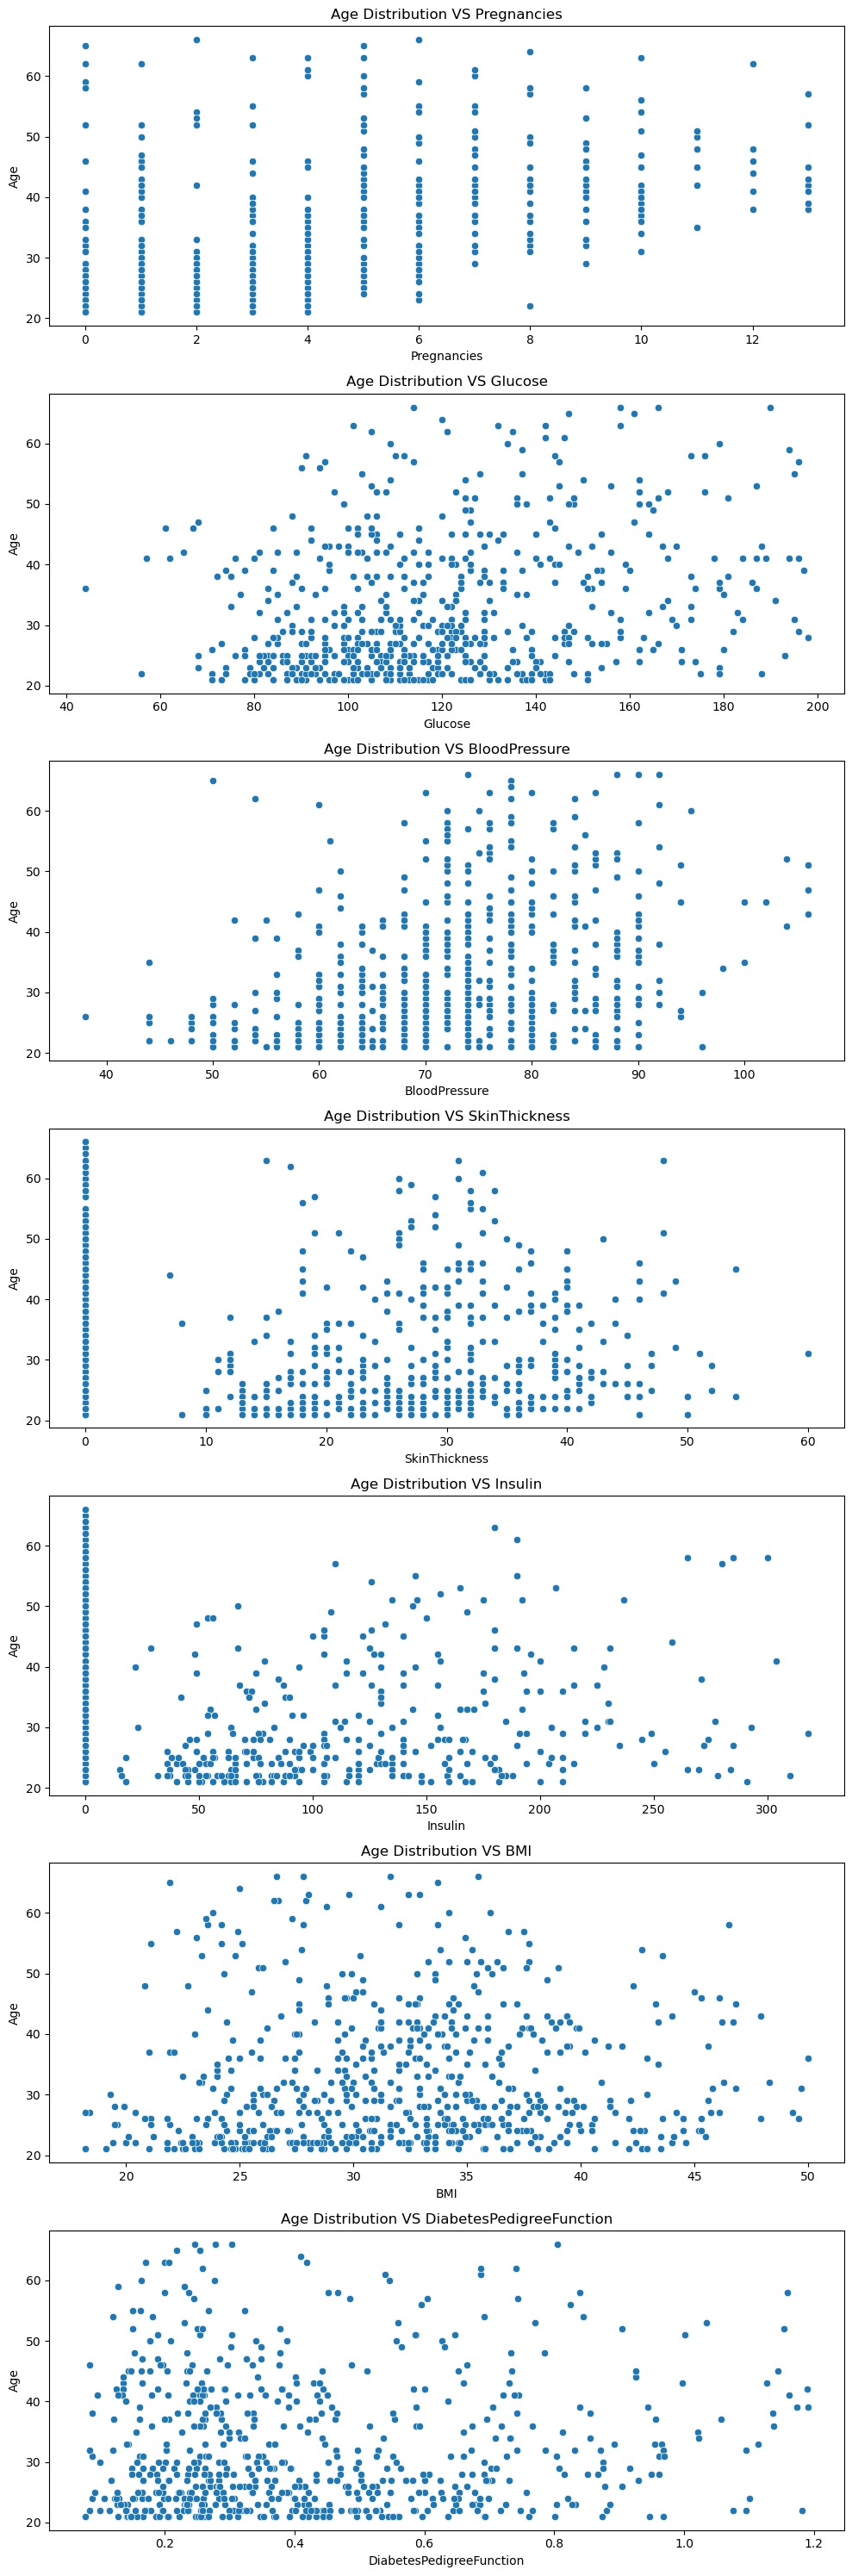

In [27]:
# Calling the function with our data and list of features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction']  
plot_scatter_age_distribution(data_cleaned, features)

## Spliting the dataset into train and test data

In [28]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [29]:
X.shape

(768, 8)

In [30]:
y.shape

(768,)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model Execution Without Feature Engineering

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 400, random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [35]:
accuracy_without_scaling = accuracy_score(y_test,ypred)
accuracy_without_scaling

0.8246753246753247

## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [37]:
accuracy_score(y_test,ypred)

0.7532467532467533

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [39]:
accuracy_score(y_test,ypred)

0.7077922077922078

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [41]:
accuracy_score(y_test,ypred)

0.7857142857142857

## Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Model Building with Feature Scaling

## Logistic Regression

In [44]:
classifier = LogisticRegression(max_iter = 400, random_state = 1)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [45]:
accuracy_with_scaling = accuracy_score(y_test,ypred)
accuracy_with_scaling

0.8246753246753247

## KNN

In [46]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [47]:
accuracy_score(y_test,ypred)

0.7987012987012987

## Decision Tree

In [48]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [49]:
accuracy_score(y_test,ypred)

0.7467532467532467

## Random Forest Classifier

In [50]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

In [51]:
accuracy_score(y_test,ypred)

0.7987012987012987

# Model Building with Outlier treated data

In [52]:
X = data_cleaned.drop('Outcome', axis = 1)
y = data_cleaned['Outcome']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
ms = MinMaxScaler()
ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [55]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [56]:
classifier = LogisticRegression(max_iter = 400, random_state = 42)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
print(f"Accuracy for Logistic Regression Model: {accuracy_score(y_test,ypred)}")

Accuracy for Logistic Regression Model: 0.78125


In [57]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
print(f"Accuracy for KNN Model: {accuracy_score(y_test,ypred)}")

Accuracy for KNN Model: 0.7265625


In [58]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
print(f"Accuracy for Decision Tree Classifier Model: {accuracy_score(y_test,ypred)}")

Accuracy for Decision Tree Classifier Model: 0.71875


In [59]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
print(f"Accuracy for Decision Tree Classifier Model: {accuracy_score(y_test,ypred)}")

Accuracy for Decision Tree Classifier Model: 0.8125


### Conclusion:

I have applied logistic regression, KNN, decision tree classifier and random forest classification for model building. Also I have done outlier treatment of the dataset to eliminate outliers. However the treatment has procured mixed results and not always have improved the accuracy. In case of logistic regression, KNN and decision tree, the accuracies have decreased after outlier treatment, but for Random forest model it has improved. This can be due to reduced number of training data which can in turn result in poor accuracy.

Also after feature scaling the accuracy has improved for three classes: KNN, Decision tree and Random forest but accuracy has decreased for logistic regression. In general,it is expected that feature scaling enhances the accuracy by standardizing the data.